<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Search <br>
<font color=696880 size=4>
    Mohammad Mahdi Abootorabi and Roozbeh Pirayadi 

____

# Personal Data

In [1]:
# Set your student number
student_number = '99101087'
Name = 'AmirReza'
Last_Name = 'Azari'

# Rules
- Make sure that all of your cells can be run perfectly. 
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.

# Q2: Simulated Annealing (100 Points)

<font size=4>
Author: Mohammad Mahdi Abootorabi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# place for your custom functions here
import math

## Knapsack Problem

In this problem, we will tackle the knapsack problem with using simulated annealing algorithm. You can find more detail about this problem [here](https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/).


To use local search algorithms, we must define our state-space. As the problem is about choosing a object or not, we define each state as a vector $S$ of size $n$ ( $n$ is total number of objects). 

$$
S_i=   \left\{
\begin{array}{ll}
      1 & \text{object $i$ is selected} \\
      0 & \text{object $i$ is not selected}
\end{array} 
\right.
$$

Write a function that generates a random state. i.e., it must return a boolean vector of size n. p is probablity of selecting an object. For example, if p=0.5, then the function must return a vector of size n in which each element is selected with 50% probability.

In [3]:
def random_state_generator(n, p=0.5):
    rbv = np.random.binomial(1, p, size=n)
    # YOUR CODE #
    return rbv

## 

## Value Function

Our Proposed Value function is:

$$
f(S) =   \left\{
\begin{array}{ll}
      \sum_{i=1}^{n} s_{i} v_{i} & \text{if  $\sum_{i=1}^{n} s_{i} w_{i} \leq W $ } \\
      0 & \text{Otherwise}
\end{array} 
\right.
$$

Note that: 

n = length of items

$s_i$ = ith item of state S

$v_i$ = ith value 

$w_i$ = ith weight 

$W$ = knapsack weight 



In [4]:
def value_function(W, weights, values, state):
    local_weight = 0
    j = 0
    for i in state:
        local_weight += i * weights[j]
        j += 1

    if local_weight > W:
        return 0

    local_value = 0
    j = 0
    for i in state:
        local_value += i * values[j]
        j += 1

    return local_value

## Acceptance probability function

the acceptance probability function calculates the probability of accepting a worse solution. It is defined as:
$$
P = e^{- \frac{(f(S_{old}) - f(S_{new}))^{1.5}}{T} }
$$

In [5]:
def prob_accept(state_value, next_state_value, temperature):
    val = 0
    if state_value - next_state_value < 0:
        val = 1
    else:
        val = math.exp(-1 * math.pow(state_value - next_state_value, 1.5) / temperature)
    
    return val

## Neighbor state generator

The neighbor state generator generates a neighbor state of the current state. Our neighbor state generator is defined as:

1- Select a random index $i$ from $[1, n]$.

2- Flip the value of $S_i$.

3- With probablity of 'prob' flip the value of another random index $j$ from $[1, n]$.

4- If this state is feasible(the sum of weights of selected objects is less than or equal to the knapsack weight), return this state. Otherwise, Continue from step 1.


In [6]:
def neighbor_state_generator(state, W, weights, values, prob=0.5):
    while True:
        help_state = np.copy(state)
        index1 = random.randint(0, len(help_state) - 1)
        if help_state[index1] == 1:
            help_state[index1] = 0
        else:
            help_state[index1] = 1

        index2 = index1
        while index1 == index2:
            index2 = random.randint(0, len(help_state) - 1)
        help_state[index2] = np.random.binomial(1, prob, size=1)[0]
        if value_function(W, weights, values, help_state) != 0:
            break
    
    return help_state

## Main function

Now Implement the main 'anneal' function that performs the algorithm. Try to experiment with different initial T and $alpha$ values to get the best result. Also, your function must implement these two stop criteria:

- If the number of iterations exceeded 'stopping_iter', stop.
- If the temperature drops below 'stopping_temprature', stop.

In [7]:
def simulated_annealing(W, weights, values, stopping_temperature=1e-8, stopping_iter=2000, alpha=0.99, T=50,
                        neighbour_prob=0.5, initial_state_true_prob=0.5):
    n = len(weights)
    current_state = random_state_generator(n, initial_state_true_prob)
    records = []
    iteration = 0
    while iteration <= stopping_iter:
        iteration += 1
        neighbour_state = neighbor_state_generator(current_state, W, weights, values, neighbour_prob)
        current_value = value_function(W, weights, values, current_state)
        neighbour_value = value_function(W, weights, values, neighbour_state)

        if neighbour_value > current_value:
            current_state = neighbour_state
            current_value = neighbour_value
        else:
            p = np.random.RandomState(5).random()
            p2 = prob_accept(current_value, neighbour_value, T)
            if p < p2:
                current_state = neighbour_state
                current_value = neighbour_value

        T *= alpha
        if T < stopping_temperature:
            break

        records.append((current_state, current_value))

    best_value = current_value
    best_solution = current_state

    return best_value, best_solution, records

Now lets run it one a sample problem. You can change the parameters of the function to get better results.

In [10]:
weights = [random.randint(0, 50) for _ in range(100)]
values = [random.randint(0, 70) for _ in range(100)]
W = 1000

best_value , best_sol, records = simulated_annealing(W, weights, values, alpha=0.99, neighbour_prob=0.2, initial_state_true_prob=0.2)
print(f'best value: {best_value}')
print(f'weight used: {np.dot(best_sol, weights)}')

# Note that at least you must reach 2400 values used in almost runs if your implementation is good enough.

best value: 2718
weight used: 1000


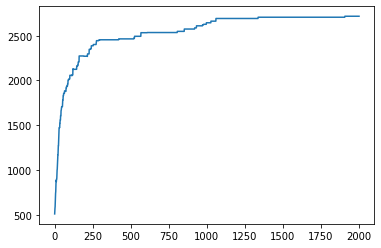

In [11]:
b = []
for inner in records:
    b.append(inner[1])
plt.plot(b)

For better evaluation now just test your algorithm on more examples and see the average value of the best solutions.

In [12]:
def test_algorithm(number_of_tests):
    sum_best_values = 0
    for i in range(number_of_tests):
        weights = [random.randint(1, 50) for _ in range(100)]
        values = [random.randint(0, 75) for _ in range(100)]
        W = 1000
        best_value, best_solution, _ = simulated_annealing(W, weights, values, alpha=0.99, neighbour_prob=0.2, initial_state_true_prob=0.2)
        print(f'best value sample {i + 1}: {best_value}')
        print(f'weight used sample {i + 1}: {np.dot(best_solution, weights)}')
        sum_best_values += best_value
    return sum_best_values / number_of_tests


In [13]:
# (15 Points)
# Reaching 2400 is good enough.

print(f"Average of best values that algorithm reached is {test_algorithm(20)}")

best value sample 1: 2668
weight used sample 1: 999
best value sample 2: 2820
weight used sample 2: 998
best value sample 3: 2769
weight used sample 3: 997
best value sample 4: 2604
weight used sample 4: 1000
best value sample 5: 2651
weight used sample 5: 997
best value sample 6: 2486
weight used sample 6: 1000
best value sample 7: 2403
weight used sample 7: 998
best value sample 8: 2484
weight used sample 8: 998
best value sample 9: 2505
weight used sample 9: 1000
best value sample 10: 2818
weight used sample 10: 1000
best value sample 11: 2667
weight used sample 11: 1000
best value sample 12: 2431
weight used sample 12: 998
best value sample 13: 2087
weight used sample 13: 999
best value sample 14: 2633
weight used sample 14: 999
best value sample 15: 2322
weight used sample 15: 988
best value sample 16: 2474
weight used sample 16: 997
best value sample 17: 2916
weight used sample 17: 1000
best value sample 18: 2738
weight used sample 18: 998
best value sample 19: 2612
weight used s